In [1]:
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
import nltk
#nltk.download('vader_lexicon')

from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer


In [2]:
# Authentication
consumerKey = "________________________"
consumerSecret = "________________________"
accessToken ="________________________"
accessTokenSecret ="________________________"
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [3]:
#Sentiment Analysis
def percentage(part,whole):
 return 100 * float(part)/float(whole)
keyword = "Bitcoin"
noOfTweet = 1000
tweets = tweepy.Cursor(api.search_tweets, q=keyword).items(noOfTweet)
positive=0
negative=0
neutral=0
polarity=0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

In [4]:
for tweet in tweets:
 
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.text)
        negative+1    
    elif pos > neg:
        positive_list.append(tweet.text)
        positive+1   
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral+1     
       

In [5]:
positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

In [6]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number:",len(tweet_list))
print("positive number:" ,len(positive_list))
print("negative number:" , len(negative_list))
print("neutral number:" ,len(neutral_list))
pos_p=round(((len(positive_list)/len(tweet_list))*100),1)
neg_p=round(((len(negative_list)/len(tweet_list))*100),1)
neu_p=round(((len(neutral_list)/len(tweet_list))*100),1)

total number: 1000
positive number: 359
negative number: 106
neutral number: 535


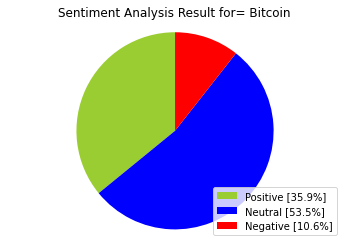

In [7]:
#Creating PieCart
labels = ['Positive ['+str(pos_p)+'%]' , 'Neutral ['+str(neu_p)+'%]','Negative ['+str(neg_p)+'%]']
sizes = [len(positive_list), len(neutral_list), len(negative_list)]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for= "+keyword+"")
plt.axis('equal')
plt.show()

In [8]:
#Cleaning Tweets
tweet_list.drop_duplicates(inplace = True)

In [9]:
#Cleaning Text (RT, Punctuation etc)
#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0–9]+)|([0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,Playing politics pays. #Bitcoin fixes this.,. # .
1,@TheCryptoLark WETHIO X AFRICAN BLOCKCHAIN AND...,\n\n...
2,RT @stevedabitcoin: Slovakya’da #Bitcoin- #Blo...,’ # - # ğ ü...
3,RT @artofbsv: Mystery Box.\n\nEvery purchase o...,.\n\n ...
4,Free #Bitcoin instantly. I have recover all my...,# . ...
5,RT @MMCrypto: #Bitcoin: it’s imminent. https:/...,# : ’ . :// . /
6,RT @AirdropDet: 🔍 Edain #Airdrop (New Round)\n...,🔍 # ( )\n\n💲 : ...
7,RT @AirdropStario: 💧 SHIBA NFT Airdrop 💧\n\n🏆 ...,💧 💧\n\n🏆 : ➕ ...
9,RT @JoaoSpreadsLove: @lowcee89 @defichain We a...,🔒 ...
10,RT @BornToRaceNft: Modify and race your dream ...,. ...


In [1]:
print("ENJOY")

ENJOY
